#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [10]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [11]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.01, 6, minSize=(25,25))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(1)
cv2.destroyAllWindows()

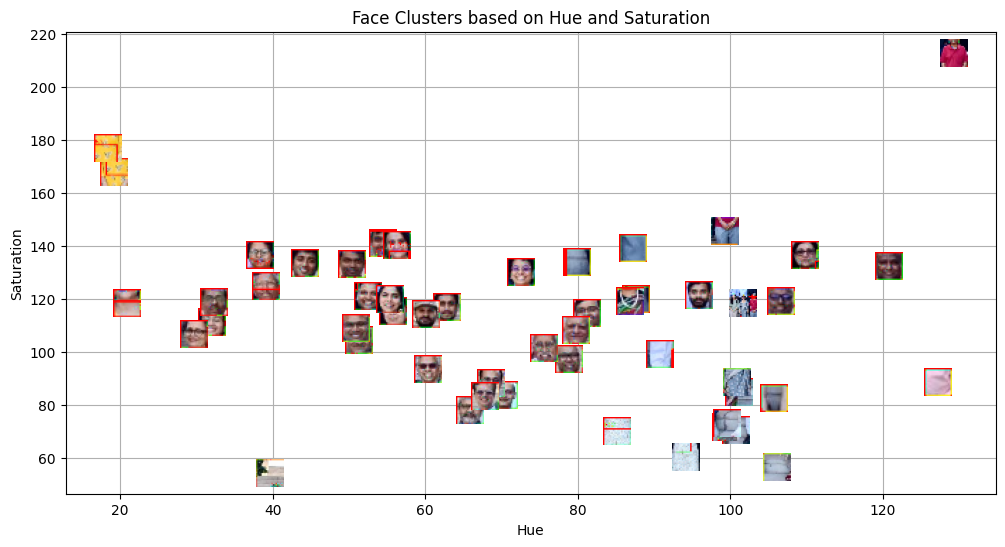

In [12]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
ax.set_xlabel('Hue')
## Put y label
ax.set_ylabel('Saturation')
## Put title
ax.set_title('Face Clusters based on Hue and Saturation')
## Put grid
ax.grid(True)
## show the plot
plt.show()

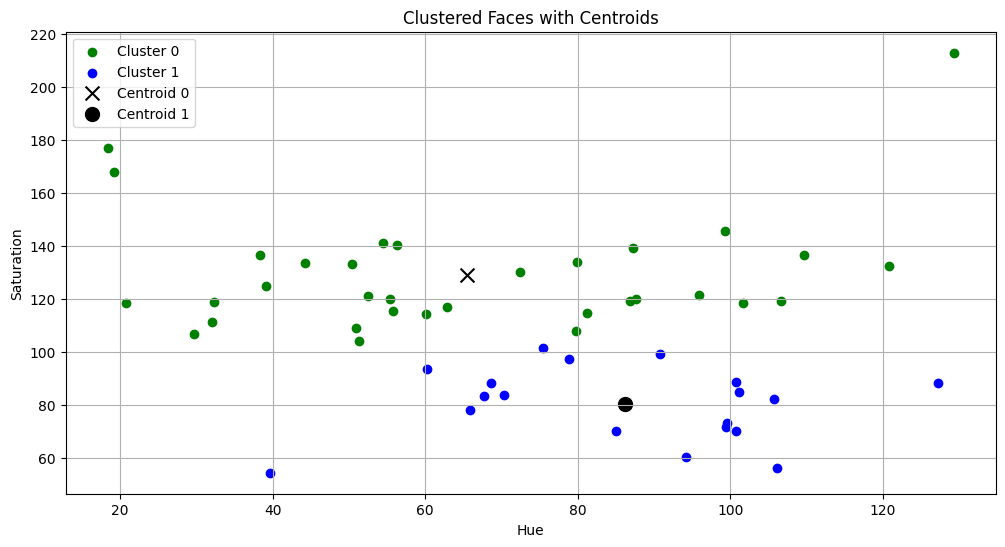

In [13]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], s=100, c='black', marker='x', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], s=100, c='black', marker='o', label='Centroid 1')

## Put x label
ax.set_xlabel('Hue')
## Put y label
ax.set_ylabel('Saturation')
## Put title
ax.set_title('Clustered Faces with Centroids')
## Add a legend
ax.legend()
## Add grid
ax.grid(True)
## Show the plot
plt.show()

In [14]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY), 1.1, 4)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow('Template Face Detection', template_img)
cv2.waitKey(1)
cv2.destroyAllWindows()

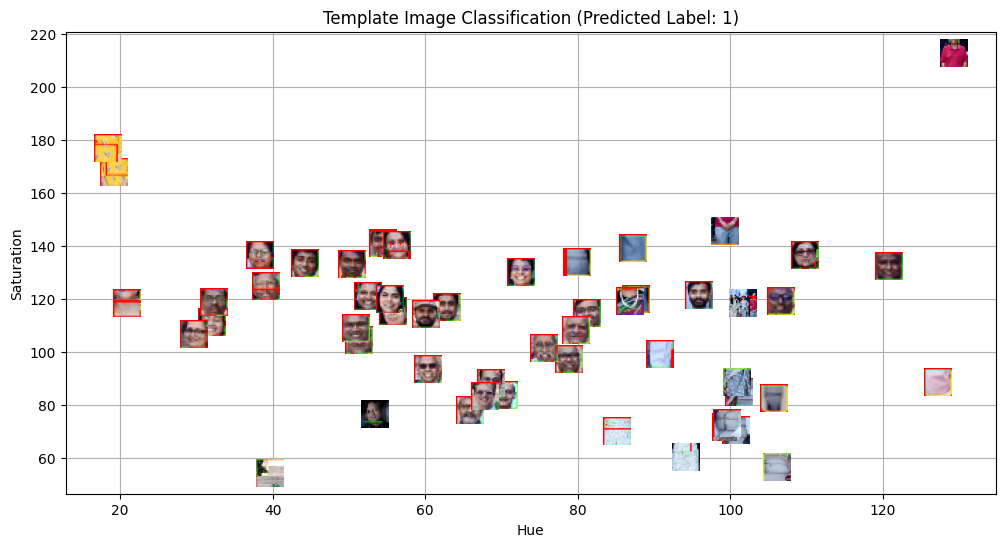

In [15]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
x, y, w, h = template_faces[0]
template_hue = np.mean(template_hsv[y:y+h, x:x+w, 0])
template_saturation = np.mean(template_hsv[y:y+h, x:x+w, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
ax.set_xlabel('Hue')
## Put y label
ax.set_ylabel('Saturation')
## Put title
ax.set_title(f'Template Image Classification (Predicted Label: {template_label})')
## Add grid
ax.grid(True)
## show plot
plt.show()

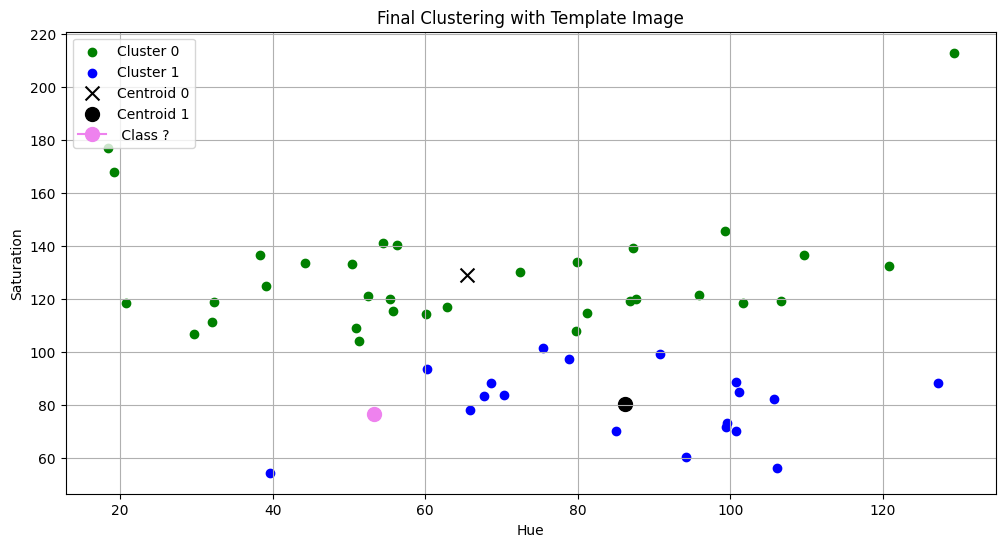

In [16]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], s=100, c='black', marker='x', label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], s=100, c='black', marker='o', label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
ax.set_xlabel('Hue')
## Put y label
ax.set_ylabel('Saturation')
## Put title
ax.set_title('Final Clustering with Template Image')
## Add a legend
ax.legend()
## Add grid
ax.grid(True)
## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

### Question 1
Common distance metrics used in distance-based classification algorithms include Euclidean Distance, which measures the straight-line distance between two points; Manhattan Distance (or L1 norm), which sums the absolute differences of their coordinates; and Minkowski Distance, which is a generalized form of both. Other specific metrics include Hamming Distance for categorical variables and Cosine Similarity (often converted to a distance) for high-dimensional data like text.

### Question 2
Distance-based classification algorithms have wide applications in the real world. They are heavily used in Face Recognition systems to match facial embeddings to a database. They are also used in Recommender Systems to find similar users or items based on feature vectors. In Medical Diagnosis, they help classify patient cases based on symptom similarity to historical data. Additionally, they are used in Handwriting Recognition and Document Classification.

### Question 3
Distance metrics quantify how "far" or "dissimilar" two data points are.

Euclidean Distance: The most common metric, calculated as the square root of the sum of squared differences. It works well for continuous, low-dimensional space.

Manhattan Distance: The sum of absolute differences. It is preferred when the data grid-like (like city blocks) or has high dimensionality where Euclidean distance might be less meaningful.

Hamming Distance: Measures the number of positions at which corresponding symbols are different, useful for binary strings or categorical data.

### Question 4
Cross-validation is a technique used to assess how well a model will generalize to an independent dataset. Its role is to prevent overfitting by ensuring the model doesn't just memorize the training data. By splitting the data into multiple folds and training/testing on different combinations, it provides a more robust estimate of model performance and helps in tuning hyperparameters (like 'k' in KNN) to find the sweet spot between bias and variance.

### Question 5

Bias: Refers to the error due to overly simplistic assumptions. High bias occurs with a large K (e.g., K=N), where the model ignores local structure and just predicts the majority class, leading to underfitting.

Variance: Refers to sensitivity to fluctuations in the training set. High variance occurs with a small K (e.g., K=1), where the model captures noise and outliers, leading to overfitting. The goal is to choose a K that balances both.

# END OF REPORT